In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider
from qiskit.circuit import Bit
from numpy import pi

In [2]:
provider = IBMProvider()

In [3]:
backend = provider.get_backend('ibmq_qasm_simulator')

In [4]:
ClassicalRegister

qiskit.circuit.classicalregister.ClassicalRegister

In [5]:
# Set up random bits
x = ClassicalRegister(1, name = 'x')
y = ClassicalRegister(1, name = 'y')
final = ClassicalRegister(2, name = 'measures')

# Setting up Bits
qra = QuantumRegister(1, name = 'Alice')
qrb = QuantumRegister(1, name = 'Bob')

qc = QuantumCircuit(qra, qrb, x, y, final)

In [6]:
qc.h(0)
qc.h(1)
qc.measure(qra,x)
qc.measure(qrb,y)

qc.reset(qra)
qc.reset(qrb)
qc.barrier()

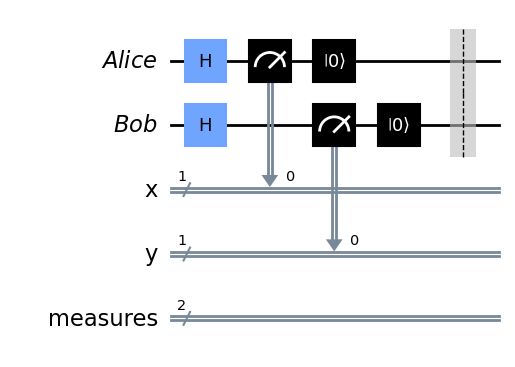

In [7]:
qc.draw('mpl')

In [8]:
# If operations through quantum
qc.ry(-pi/8,0).c_if(x,1)
qc.ry(pi/8,0).c_if(x,0)

In [9]:
qc.ry(pi/4,1).c_if(x,1)
qc.ry(0,1).c_if(x,0)
qc.barrier()

In [10]:
qc.measure(0,final)
qc.measure(1,final)

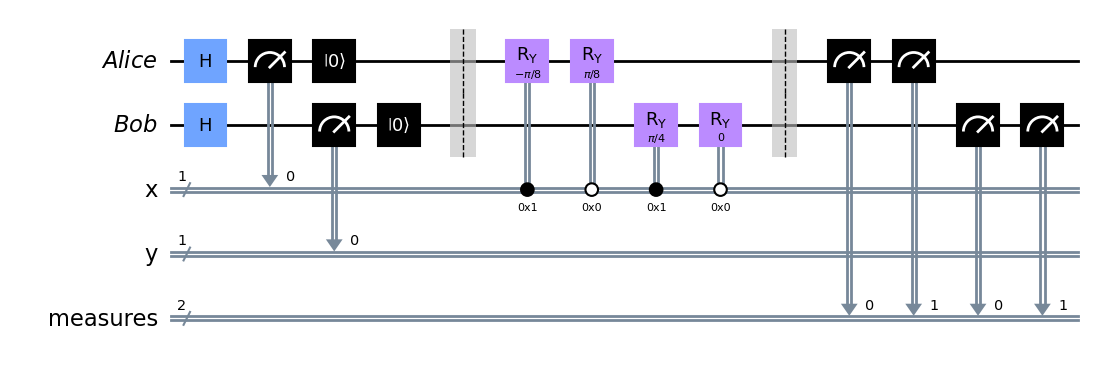

In [11]:
qc.draw('mpl')

In [12]:
job = backend.run(qc, shots = 10000, dynamic=True)

/home/toor/.local/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_backend.py:443: UserWarning: The backend ibmq_qasm_simulator does not support dynamic circuits.
  warnings.warn(f"The backend {self.name} does not support dynamic circuits.")


In [13]:
result = job.result()
counts = result.get_counts()

In [14]:
counts

{'11 1 1': 358,
 '00 0 1': 2123,
 '00 1 1': 2140,
 '11 0 1': 395,
 '00 0 0': 2449,
 '00 1 0': 2535}

In [15]:
from qiskit.visualization import plot_histogram

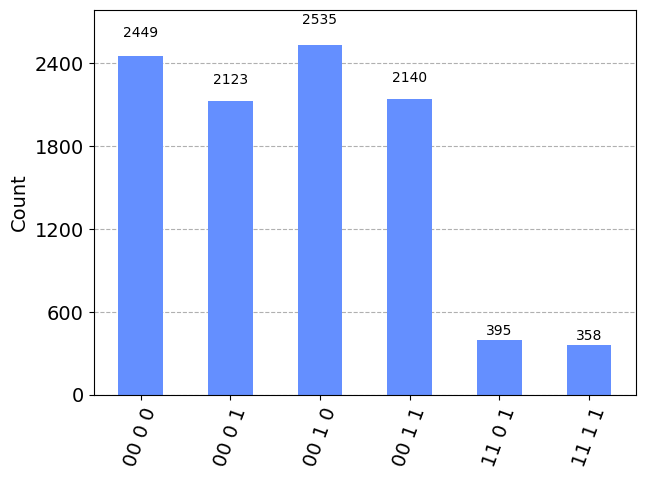

In [16]:
plot_histogram(counts)